In [3]:
# Imports NumPy, a library for numerical computations, mainly used for handling arrays and mathematical operations.
import numpy as np
 #Imports Pandas, a library for data manipulation and analysis, especially useful for working with tabular data.
import pandas as pd
 #Imports Matplotlib's pyplot module, which provides functionalities for data visualization.
import matplotlib.pyplot as plt
 #Imports ticker, a module for controlling tick locations and formatting in Matplotlib plots.
import matplotlib.ticker as ticker
#Imports the imbalanced-learn package, which provides techniques for handling imbalanced datasets (e.g., oversampling, undersampling).
import imblearn
 # Converts raw text data into numerical features using Term Frequency-Inverse Document Frequency (TF-IDF), which reflects the importance of words in a document relative to a collection.
from sklearn.feature_extraction.text import TfidfVectorizer
# Implements Logistic Regression with built-in cross-validation for automatic hyperparameter tuning.
from sklearn.linear_model import LogisticRegressionCV
 # Standard Logistic Regression classifier for binary/multi-class classification.
from sklearn.linear_model import LogisticRegression
#Implements the Naïve Bayes classifier based on Gaussian distribution assumptions, often used for text classification.
from sklearn.naive_bayes import GaussianNB
 #Implements the k-Nearest Neighbors (KNN) algorithm, a non-parametric classifier that predicts based on the majority class of nearest neighbors.
from sklearn.neighbors import KNeighborsClassifier
#Implements a Multi-Layer Perceptron (MLP), a type of neural network for classification problems.
from sklearn.neural_network import MLPClassifier
#Implements the Support Vector Classifier (SVM), which finds an optimal hyperplane for separating classes.
from sklearn.svm import SVC
# Implements a decision tree, which splits data based on feature conditions to classify instances.
from sklearn.tree import DecisionTreeClassifier
#An ensemble learning method that constructs multiple decision trees and aggregates their predictions for improved accuracy.
from sklearn.ensemble import RandomForestClassifier

'''accuracy_score: Computes the ratio of correctly predicted instances to total instances.

                                                  # precision_score: Measures how many predicted positive instances are actually positive (TP / (TP + FP)).

                                                  # confusion_matrix: Generates a matrix displaying true positives, false positives, true negatives, and false negatives.

                                                  # roc_auc_score: Computes the Area Under the Receiver Operating Characteristic (ROC) Curve, a measure of classification quality.

                                                  # roc_curve: Generates the ROC curve, which plots True Positive Rate vs. False Positive Rate.ecision trees and aggregates their predictions for improved accuracy.'''
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, roc_auc_score, roc_curve


# Performs an exhaustive search over a specified set of hyperparameters to find the optimal model configuration.
from sklearn.model_selection import GridSearchCV
 #Combines multiple classifiers to make final predictions, improving model robustness and performance.
from sklearn.ensemble import VotingClassifier
'''f1_score: A harmonic mean of precision and recall, useful when class distribution is imbalanced recall_score: Measures how many actual positive instances were correctly predicted (TP / (TP + FN)).'''
from sklearn.metrics import f1_score, recall_score

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
folder_path = '/content/drive/My Drive/Datasets/'
csv_files = [f for f in os.listdir(folder_path ) if f.endswith('.csv')] #A list containing the names of CSV files in a specified folder.
# folder_path : The path to the directory where CSV files are stored.
print(csv_files)

['Youtube01-Psy.csv', 'Youtube04-Eminem.csv', 'Youtube05-Shakira.csv', 'Youtube02-KatyPerry.csv', 'Youtube03-LMFAO.csv']


In [6]:
file_paths = []  # Create an empty list to store the dataframes after reading each CSV file

for file in csv_files:  # Loop through each file name in the list 'csv_files'
    file_path = os.path.join(folder_path, file)  # Combine the folder path and file name to get the full path
    df = pd.read_csv(file_path)  # Read the CSV file into a dataframe
    file_paths.append(df)  # Add the dataframe to the list 'file_paths'

# Combine all dataframes in the list into one dataframe
combined_df = pd.concat(file_paths, ignore_index=True)  # Merge all dataframes and reset the index
print(combined_df.head())  # Print the first 5 rows of the combined dataframe
print(combined_df.columns)  # Print the names of all columns in the dataframe

# Rename columns to standard names expected in the project
combined_df.rename(columns={
    'CONTENT': 'text',       # Rename 'CONTENT' column to 'text'
    'CLASS': 'sentiment',    # Rename 'CLASS' column to 'sentiment' (this is the label)
}, inplace=True)

# Split the data into training, gold, and test sets
train_data = combined_df.sample(frac=0.7, random_state=42)  # Take 70% of the data for training
remaining_data = combined_df.drop(train_data.index)  # The remaining 30% is stored separately
gold_data = remaining_data.sample(frac=0.5, random_state=42)  # Take half of the remaining data as 'gold' data
test_data = remaining_data.drop(gold_data.index)  # The rest becomes the test data

# Save the datasets to CSV files
train_data.to_csv('/content/drive/MyDrive/Datasets/train_data.csv', index=False)  # Save training data to CSV
gold_data.to_csv('/content/drive/MyDrive/Datasets/gold_train.csv', sep='\t', index=False)  # Save gold data with tab-separated values
test_data.to_csv('/content/drive/MyDrive/Datasets/test.csv', sep='\t', index=False)  # Save test data with tab-separated values

# Reload the saved datasets from the CSV files
crowd_data = pd.read_csv('/content/drive/MyDrive/Datasets/train_data.csv')  # Load training data
gold_data = pd.read_csv('/content/drive/MyDrive/Datasets/gold_train.csv', sep='\t', on_bad_lines='warn')  # Load gold data
test_data = pd.read_csv('/content/drive/MyDrive/Datasets/test.csv', sep='\t', on_bad_lines='warn')  # Load test data

print("The files have been created successfully!")  # Print a message after everything is done


                                    COMMENT_ID            AUTHOR  \
0  LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU         Julius NM   
1  LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A       adam riyati   
2  LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8  Evgeny Murashkin   
3          z13jhp0bxqncu512g22wvzkasxmvvzjaz04   ElNino Melendez   
4          z13fwbwp1oujthgqj04chlngpvzmtt3r3dw            GsMega   

                  DATE                                            CONTENT  \
0  2013-11-07T06:20:48  Huh, anyway check out this you[tube] channel: ...   
1  2013-11-07T12:37:15  Hey guys check out my new channel and our firs...   
2  2013-11-08T17:34:21             just for test I have to say murdev.com   
3  2013-11-09T08:28:43   me shaking my sexy ass on my channel enjoy ^_^ ﻿   
4  2013-11-10T16:05:38            watch?v=vtaRGgvGtWQ   Check this out .﻿   

   CLASS  
0      1  
1      1  
2      1  
3      1  
4      1  
Index(['COMMENT_ID', 'AUTHOR', 'DATE', 'CONTENT', 'CLASS'], dt

In [7]:
# Convert the 'DATE' column to datetime format so that we can work with dates properly
combined_df['DATE'] = pd.to_datetime(df['DATE'])

# Convert the 'COMMENT_ID' column to string type (in case it’s stored as a number)
combined_df['COMMENT_ID'] = df['COMMENT_ID'].astype(str)

# Show a summary of the dataframe including number of non-null values, column data types, and memory usage
combined_df.info()

# Show basic statistics for numeric columns (like count, mean, std, min, max, etc.)
combined_df.describe()

# Count how many missing (null) values are in each column
combined_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   COMMENT_ID  438 non-null    object        
 1   AUTHOR      1956 non-null   object        
 2   DATE        438 non-null    datetime64[ns]
 3   text        1956 non-null   object        
 4   sentiment   1956 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 76.5+ KB


,0
COMMENT_ID,1518
AUTHOR,0
DATE,1518
text,0
sentiment,0


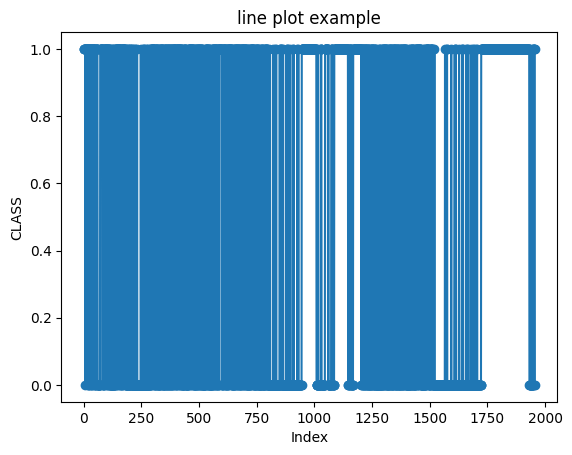

In [8]:
import matplotlib.pyplot as plt
plt.plot(combined_df.index, combined_df['sentiment'],marker = 'o', linestyle='-') #Plots a line graph with markers.
plt.xlabel('Index') #Labels the x-axis as "CONTENT".
plt.ylabel('CLASS') #Labels the y-axis as "CLASS".
plt.title('line plot example') #Sets the plot title.
plt.show() #Displays the plot.

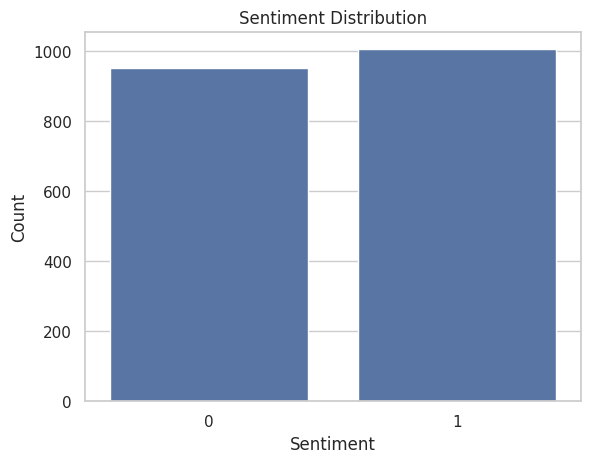

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment class
sentiment_counts = combined_df['sentiment'].value_counts()

# Create a bar plot with class labels on the X-axis
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()


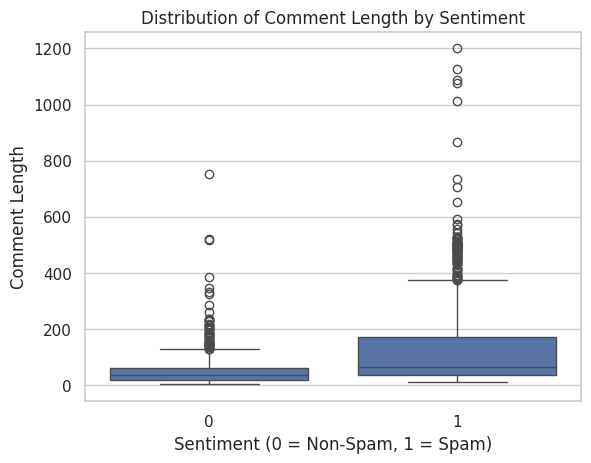

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column for comment length
combined_df['text_length'] = combined_df['text'].apply(len)

# Box plot: comment length distribution for each sentiment class
sns.boxplot(x=combined_df['sentiment'], y=combined_df['text_length'])

plt.xlabel('Sentiment (0 = Non-Spam, 1 = Spam)')
plt.ylabel('Comment Length')
plt.title('Distribution of Comment Length by Sentiment')
plt.show()


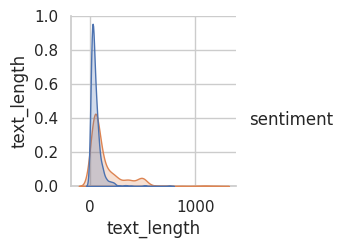

In [147]:
sns.pairplot(combined_df, hue='sentiment')
plt.show()


In [148]:
# Select the first 70% of Ham and 70% of Spam for training

crowd_data_shuffled = crowd_data.sample(frac=1,random_state=0)
gold_data_shuffled = gold_data.sample(frac=1,random_state=0)
test_data_shuffled = test_data.sample(frac=1,random_state=0)


# Combine to make X_train, y_train, X_test, y_test

X_train=crowd_data_shuffled['text']
y_train=crowd_data_shuffled['sentiment']

X_gold_train = gold_data_shuffled['text']
Y_gold_train = gold_data_shuffled['sentiment']

X_test=test_data_shuffled['text']
y_test=test_data_shuffled['sentiment']


In [149]:
# Represent each comment using TF-IDF features

corpus = crowd_data.iloc[:,3]

vectorizer = TfidfVectorizer(stop_words=None).fit(corpus)

v_train=vectorizer.transform(X_train)
print(v_train.shape)
print(v_train.toarray())

v_test=vectorizer.transform(X_test)
print(v_test.shape)
print(v_test.toarray())


(1369, 3665)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(293, 3665)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [150]:
# Using Logistic Regression, determine the best lambda value

# Cs is inverse of lambda
# log_10(lambda) value from [-5,-4,...,5]

Cs = list(np.power(10.0, np.arange(5, -6, -1)))

clf = LogisticRegressionCV(
    Cs=Cs,
    cv=5,
    penalty='l2',
    scoring='roc_auc',
    solver='newton-cg',
    max_iter=30000,
    random_state=0
).fit(v_train, y_train)

# Find the correct class label used in scores_
pos_class = clf.classes_[1]  # scores_ key should be this class
mean_scores = clf.scores_[pos_class].mean(axis=0)

print('lambda=1/Cs, so the auc_roc score for log_10(lambda) value from [-5,-4,...,5]=\n', mean_scores)
print('The max auc_roc:', mean_scores.max())

i = int(np.argmax(mean_scores))
Cs_select = Cs[i]
print('The max auc_roc occurs when lambda =', 1 / Cs_select)

lambda=1/Cs, so the auc_roc score for log_10(lambda) value from [-5,-4,...,5]=
 [0.9870373  0.9870373  0.9870373  0.98728399 0.98730669 0.98482865
 0.97878968 0.97045923 0.96798809 0.96768893 0.96766756]
The max auc_roc: 0.9873066927577753
The max auc_roc occurs when lambda = 0.1


Training data Confusion Matrix:
 [[646   2]
 [  0 721]]
Accuracy for training = 0.9985390796201608
Precision for training = 0.9972337482710927
Recall for training = 1.0
F1 score for training = 0.9986149584487535
AUC in Training: 0.9999978596256913


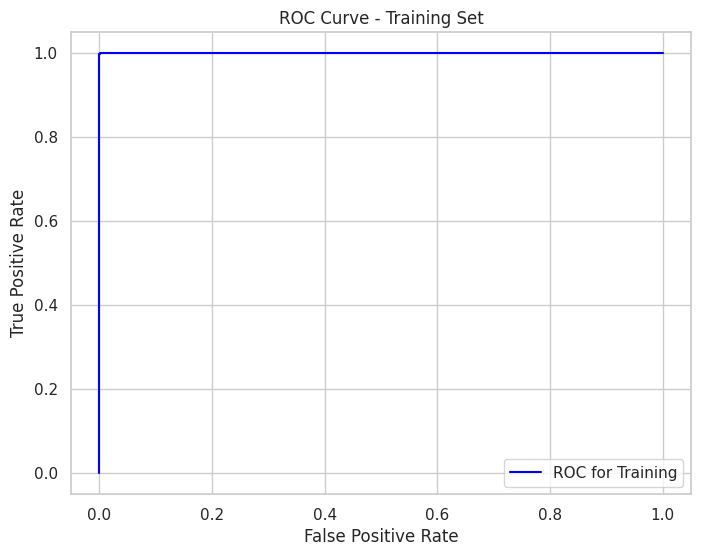

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Clear metric lists
accuracy = []
precisions = []
recall = []
F1 = []
train_error = []

# Train Logistic Regression with best C (inverse of lambda)
clf = LogisticRegression(random_state=0, C=Cs_select, penalty='l2', max_iter=30000)
clf.fit(v_train, y_train)

# Predict hard labels and probabilities
y_train_pred = clf.predict(v_train)
y_train_pred_prob = clf.predict_proba(v_train)[:, 1]  # Probabilities for positive class (1)

# Confusion Matrix
cm0 = confusion_matrix(y_train, y_train_pred)
print('Training data Confusion Matrix:\n', cm0)

# Accuracy
acc = accuracy_score(y_train, y_train_pred)
accuracy.append(acc)
print('Accuracy for training =', acc)

# Precision
prec = precision_score(y_train, y_train_pred)
precisions.append(prec)
print('Precision for training =', prec)

# Recall
rec = recall_score(y_train, y_train_pred)
recall.append(rec)
print('Recall for training =', rec)

# F1 Score
f1 = f1_score(y_train, y_train_pred)
F1.append(f1)
print('F1 score for training =', f1)

# ROC and AUC
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_prob)
auc_train = roc_auc_score(y_train, y_train_pred_prob)
print('AUC in Training:', auc_train)

# Plot ROC curve for training
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', linestyle='-', label='ROC for Training')
plt.title('ROC Curve - Training Set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


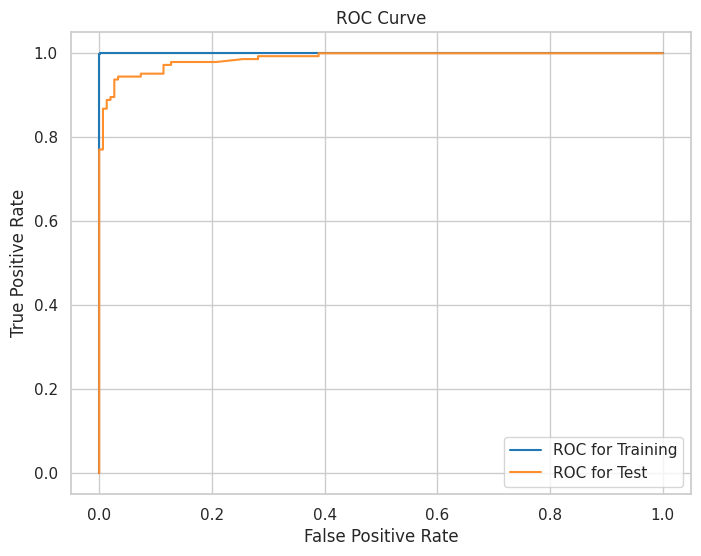

AUC in Training: 0.9999978596256913
AUC in Test: 0.9875326249067861


In [152]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities instead of class labels for ROC
y_train_pred_prob = clf.predict_proba(v_train)[:, 1]
y_test_pred_prob = clf.predict_proba(v_test)[:, 1]

# Compute ROC curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)

# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='#2178b5', linestyle='-', label='ROC for Training')
plt.plot(fpr_test, tpr_test, color='#ff8f2c', linestyle='-', label='ROC for Test')
plt.legend()
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

# AUC Scores
print('AUC in Training:', roc_auc_score(y_train, y_train_pred_prob))
print('AUC in Test:', roc_auc_score(y_test, y_test_pred_prob))


# Blue Curve (Training ROC):

# The curve hugs the top-left corner.

# AUC: ~0.99999 → near perfect classifier on training data.

# Orange Curve (Test ROC):

# Also close to the top-left.

# AUC: ~0.9875 → excellent generalization to test data.

# Interpretation:

# Minimal overfitting: Training and test AUCs are very close.

#classifier (logistic regression) is well-regularized, likely thanks to your lambda tuning (LogisticRegressionCV).

#TF-IDF vectorization and model training pipeline are working correctly.'''


Training Accuracy: 0.9013878743608473
Training Precision: 1.0
Training Recall: 0.812760055478502
Training F1 Score: 0.8967100229533282
Training AUC-ROC: 0.9063800277392511
Test Accuracy: 0.7474402730375427
Test Precision: 0.8017241379310345
Test Recall: 0.6458333333333334
Test F1 Score: 0.7153846153846154
Test AUC-ROC: 0.7457354586129754


<Figure size 600x500 with 0 Axes>

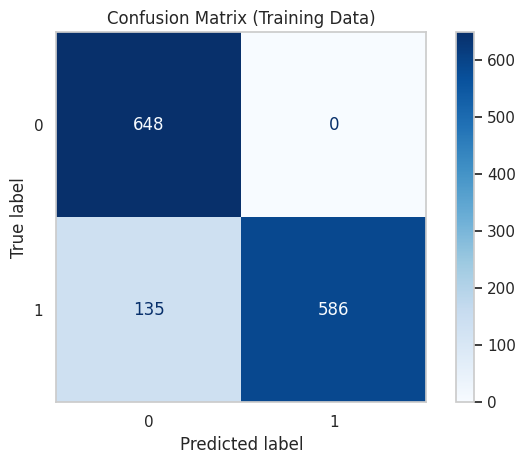

<Figure size 600x500 with 0 Axes>

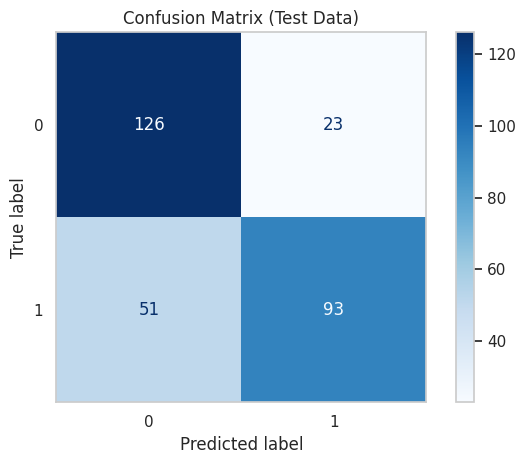

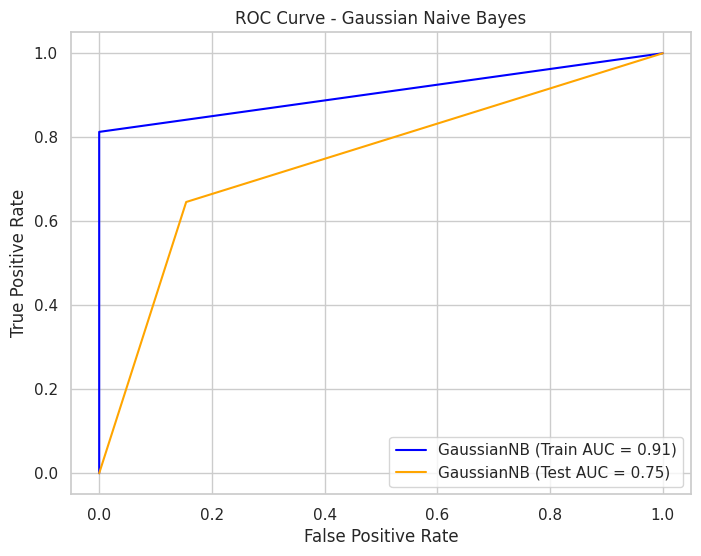

In [153]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Convert sparse TF-IDF matrices to dense arrays (GaussianNB requires dense input)
v_train_dense = v_train.toarray()
v_test_dense = v_test.toarray()

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(v_train_dense, y_train)

# Predictions
y_train_pred = gnb.predict(v_train_dense)
y_test_pred = gnb.predict(v_test_dense)

# Probabilities (for AUC and ROC)
y_train_prob = gnb.predict_proba(v_train_dense)[:, 1]
y_test_prob = gnb.predict_proba(v_test_dense)[:, 1]

# --- Performance Metrics ---
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
auc_train = roc_auc_score(y_train, y_train_prob)

accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
auc_test = roc_auc_score(y_test, y_test_prob)

# Print Metrics
print("Training Accuracy:", accuracy_train)
print("Training Precision:", precision_train)
print("Training Recall:", recall_train)
print("Training F1 Score:", f1_train)
print("Training AUC-ROC:", auc_train)

print("Test Accuracy:", accuracy_test)
print("Test Precision:", precision_test)
print("Test Recall:", recall_test)
print("Test F1 Score:", f1_test)
print("Test AUC-ROC:", auc_test)

# --- Confusion Matrices ---
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix - Training
plt.figure(figsize=(6, 5))
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=gnb.classes_)
disp_train.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Training Data)")
plt.grid(False)
plt.tight_layout()
plt.show()

# Plot confusion matrix - Testing
plt.figure(figsize=(6, 5))
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=gnb.classes_)
disp_test.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Test Data)")
plt.grid(False)
plt.tight_layout()
plt.show()

# --- ROC Curve ---
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='GaussianNB (Train AUC = %0.2f)' % auc_train, color='blue')
plt.plot(fpr_test, tpr_test, label='GaussianNB (Test AUC = %0.2f)' % auc_test, color='orange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gaussian Naive Bayes')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [136]:
# Compare the two ML approaches in Psy data set

data = pd.read_csv("/content/drive/My Drive/Datasets/Youtube01-Psy.csv")
#data = pd.read_csv('Youtube02-KatyPerry.csv')
#data = pd.read_csv('Youtube03-LMFAO.csv')
#data = pd.read_csv('Youtube04-Eminem.csv')
#data = pd.read_csv('Youtube05-Shakira.csv')

#data.info()

X=data.iloc[:,3].to_numpy()
y = data.iloc[:,4].to_numpy()

index_1=np.where(y==1)
index_0=np.where(y==0)

L1=np.rint(len(index_1[0])*0.5)
L0=np.rint(len(index_0[0])*0.5)

L1=L1.astype(int)
L0=L0.astype(int)

temp=[]
for item in index_1:
    temp=np.append(temp,item)

temp=temp.astype(int)

I=temp[0:L1-1]
X_train_1=X[I]
y_train_1=y[I]

I=temp[L1:len(temp)]
X_test_1=X[I]
y_test_1=y[I]

temp=[]
for item in index_0:
    temp=np.append(temp,item)

temp=temp.astype(int)

I=temp[0:L0-1]
X_train_0=X[I]
y_train_0=y[I]

I=temp[L0:len(temp)]
X_test_0=X[I]
y_test_0=y[I]


# Combine to make X_train, y_train, X_test, y_test

X_train=np.concatenate((X_train_1, X_train_0), axis=0)
y_train=np.concatenate((y_train_1, y_train_0), axis=0)

X_test=np.concatenate((X_test_1, X_test_0), axis=0)
y_test=np.concatenate((y_test_1, y_test_0), axis=0)


corpus = data.iloc[:,3]

vectorizer = TfidfVectorizer(stop_words=None, max_features=800).fit(corpus)
#vectorizer = TfidfVectorizer(stop_words=None).fit(corpus)

v_train=vectorizer.transform(X_train)

v_test=vectorizer.transform(X_test)


clf = LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(5, -6, -1))), cv=5, penalty='l2', scoring='roc_auc',
                           solver='newton-cg', max_iter=30000, random_state=0).fit(v_train, y_train)

i=np.where(clf.scores_[1].mean(axis=0)==clf.scores_[1].mean(axis=0).max())
if len(i[0])==0:
    i=int(i[0])
else:
    i=int(i[0][0])
Cs=list(np.power(10.0, np.arange(5, -6, -1)))
Cs_select=Cs[i]

accuracy=[]
precisions=[]
recall=[]
F1=[]
AUC=[]

clf = LogisticRegression(random_state=0, C=Cs_select, penalty='l2', max_iter=30000).fit(v_train, y_train)
y_pred=clf.predict(v_test)


# Confusion Matrix
cm = confusion_matrix(y_test,y_pred)

# Accuracy
accuracy.append((cm[1,1]+cm[0,0])/(cm[1,1]+cm[0,0]+cm[0,1]+cm[1,0]+0.000001))

# Precision
precisions.append(cm[1,1]/(cm[1,1]+cm[0,1]+0.000001))

# Recall
recall.append(cm[1,1]/(cm[1,1]+cm[1,0]+0.000001))


#F1 score
F1.append(2*cm[1,1]/(2*cm[1,1]+cm[0,1]+cm[1,0]+0.000001))


# AUC
AUC.append(roc_auc_score(y_test, y_pred))



v_train_dense=v_train.toarray()
v_test_dense=v_test.toarray()

clf = GaussianNB().fit(v_train_dense, y_train)
y_pred=clf.predict(v_test_dense)

# Confusion Matrix
cm = confusion_matrix(y_test,y_pred)

# Accuracy
accuracy.append((cm[1,1]+cm[0,0])/(cm[1,1]+cm[0,0]+cm[0,1]+cm[1,0]+0.000001))

# Precision
precisions.append(cm[1,1]/(cm[1,1]+cm[0,1]+0.000001))

# Recall
recall.append(cm[1,1]/(cm[1,1]+cm[1,0]+0.000001))


#F1 score
F1.append(2*cm[1,1]/(2*cm[1,1]+cm[0,1]+cm[1,0]+0.000001))


# AUC
AUC.append(roc_auc_score(y_test, y_pred))


headings = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
names = ['LogisticRegression','NB-Gaussian']
numpy_data=np.array([accuracy,precisions,recall,F1,AUC]).T

df = pd.DataFrame(data=numpy_data, index=names, columns=headings)

print('The Performance for Psy is summarized in the following Table:')

#display(df)
display(df.style.highlight_max(color = 'lightgreen', axis = 0))



The Performance for Psy is summarized in the following Table:


,Accuracy,Precision,Recall,F1,AUC
LogisticRegression,0.936782,0.987179,0.885057,0.933333,0.936782
NB-Gaussian,0.839080,0.786408,0.931034,0.852632,0.839080


In [137]:
# Compare the two ML approaches in KatyPerry data set

data = pd.read_csv("/content/drive/My Drive/Datasets/Youtube01-Psy.csv")
#data = pd.read_csv('Youtube02-KatyPerry.csv')
#data = pd.read_csv('Youtube03-LMFAO.csv')
#data = pd.read_csv('Youtube04-Eminem.csv')
#data = pd.read_csv('Youtube05-Shakira.csv')

#data.info()

X=data.iloc[:,3].to_numpy()
y = data.iloc[:,4].to_numpy()

index_1=np.where(y==1)
index_0=np.where(y==0)

L1=np.rint(len(index_1[0])*0.8)
L0=np.rint(len(index_0[0])*0.8)

L1=L1.astype(int)
L0=L0.astype(int)

temp=[]
for item in index_1:
    temp=np.append(temp,item)

temp=temp.astype(int)

I=temp[0:L1-1]
X_train_1=X[I]
y_train_1=y[I]

I=temp[L1:len(temp)]
X_test_1=X[I]
y_test_1=y[I]

temp=[]
for item in index_0:
    temp=np.append(temp,item)

temp=temp.astype(int)

I=temp[0:L0-1]
X_train_0=X[I]
y_train_0=y[I]

I=temp[L0:len(temp)]
X_test_0=X[I]
y_test_0=y[I]


# Combine to make X_train, y_train, X_test, y_test

X_train=np.concatenate((X_train_1, X_train_0), axis=0)
y_train=np.concatenate((y_train_1, y_train_0), axis=0)

X_test=np.concatenate((X_test_1, X_test_0), axis=0)
y_test=np.concatenate((y_test_1, y_test_0), axis=0)


corpus = data.iloc[:,3]

vectorizer = TfidfVectorizer(stop_words=None, max_features=800).fit(corpus)
#vectorizer = TfidfVectorizer(stop_words=None).fit(corpus)

v_train=vectorizer.transform(X_train)

v_test=vectorizer.transform(X_test)


clf = LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(5, -6, -1))), cv=5, penalty='l2', scoring='roc_auc',
                           solver='newton-cg', max_iter=30000, random_state=0).fit(v_train, y_train)

i=np.where(clf.scores_[1].mean(axis=0)==clf.scores_[1].mean(axis=0).max())
i=int(i[0])
Cs=list(np.power(10.0, np.arange(5, -6, -1)))
Cs_select=Cs[i]

accuracy=[]
precisions=[]
recall=[]
F1=[]
AUC=[]

clf = LogisticRegression(random_state=0, C=Cs_select, penalty='l2', max_iter=30000).fit(v_train, y_train)
y_pred=clf.predict(v_test)


# Confusion Matrix
cm = confusion_matrix(y_test,y_pred)

# Accuracy
accuracy.append((cm[1,1]+cm[0,0])/(cm[1,1]+cm[0,0]+cm[0,1]+cm[1,0]+0.000001))

# Precision
precisions.append(cm[1,1]/(cm[1,1]+cm[0,1]+0.000001))

# Recall
recall.append(cm[1,1]/(cm[1,1]+cm[1,0]+0.000001))


#F1 score
F1.append(2*cm[1,1]/(2*cm[1,1]+cm[0,1]+cm[1,0]+0.000001))


# AUC
AUC.append(roc_auc_score(y_test, y_pred))



v_train_dense=v_train.toarray()
v_test_dense=v_test.toarray()

clf = GaussianNB().fit(v_train_dense, y_train)
y_pred=clf.predict(v_test_dense)

# Confusion Matrix
cm = confusion_matrix(y_test,y_pred)

# Accuracy
accuracy.append((cm[1,1]+cm[0,0])/(cm[1,1]+cm[0,0]+cm[0,1]+cm[1,0]+0.000001))

# Precision
precisions.append(cm[1,1]/(cm[1,1]+cm[0,1]+0.000001))

# Recall
recall.append(cm[1,1]/(cm[1,1]+cm[1,0]+0.000001))


#F1 score
F1.append(2*cm[1,1]/(2*cm[1,1]+cm[0,1]+cm[1,0]+0.000001))


# AUC
AUC.append(roc_auc_score(y_test, y_pred))


headings = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
names = ['LogisticRegression','NB-Gaussian']
numpy_data=np.array([accuracy,precisions,recall,F1,AUC]).T

df = pd.DataFrame(data=numpy_data, index=names, columns=headings)

print('The Performance for KatyPerry is summarized in the following Table:')

#display(df)
display(df.style.highlight_max(color = 'lightgreen', axis = 0))



The Performance for KatyPerry is summarized in the following Table:


<ipython-input-137-a5f0a4c55ec3>:75: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  i=int(i[0])


,Accuracy,Precision,Recall,F1,AUC
LogisticRegression,0.957143,1.000000,0.914286,0.955224,0.957143
NB-Gaussian,0.828571,0.848485,0.800000,0.823529,0.828571


In [138]:
# Compare the two ML approaches in LMFAO data set

#data = pd.read_csv('Youtube01-Psy.csv')
#data = pd.read_csv('Youtube02-KatyPerry.csv')
data = pd.read_csv('/content/drive/My Drive/Datasets/Youtube03-LMFAO.csv')
#data = pd.read_csv('Youtube04-Eminem.csv')
#data = pd.read_csv('Youtube05-Shakira.csv')

#data.info()

X=data.iloc[:,3].to_numpy()
y = data.iloc[:,4].to_numpy()

index_1=np.where(y==1)
index_0=np.where(y==0)

L1=np.rint(len(index_1[0])*0.8)
L0=np.rint(len(index_0[0])*0.8)

L1=L1.astype(int)
L0=L0.astype(int)

temp=[]
for item in index_1:
    temp=np.append(temp,item)

temp=temp.astype(int)

I=temp[0:L1-1]
X_train_1=X[I]
y_train_1=y[I]

I=temp[L1:len(temp)]
X_test_1=X[I]
y_test_1=y[I]

temp=[]
for item in index_0:
    temp=np.append(temp,item)

temp=temp.astype(int)

I=temp[0:L0-1]
X_train_0=X[I]
y_train_0=y[I]

I=temp[L0:len(temp)]
X_test_0=X[I]
y_test_0=y[I]


# Combine to make X_train, y_train, X_test, y_test

X_train=np.concatenate((X_train_1, X_train_0), axis=0)
y_train=np.concatenate((y_train_1, y_train_0), axis=0)

X_test=np.concatenate((X_test_1, X_test_0), axis=0)
y_test=np.concatenate((y_test_1, y_test_0), axis=0)


corpus = data.iloc[:,3]

vectorizer = TfidfVectorizer(stop_words=None, max_features=800).fit(corpus)
#vectorizer = TfidfVectorizer(stop_words=None).fit(corpus)

v_train=vectorizer.transform(X_train)

v_test=vectorizer.transform(X_test)


clf = LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(5, -6, -1))), cv=5, penalty='l2', scoring='roc_auc',
                           solver='newton-cg', max_iter=30000, random_state=0).fit(v_train, y_train)

i=np.where(clf.scores_[1].mean(axis=0)==clf.scores_[1].mean(axis=0).max())
i=int(i[0])
Cs=list(np.power(10.0, np.arange(5, -6, -1)))
Cs_select=Cs[i]

accuracy=[]
precisions=[]
recall=[]
F1=[]
AUC=[]

clf = LogisticRegression(random_state=0, C=Cs_select, penalty='l2', max_iter=30000).fit(v_train, y_train)
y_pred=clf.predict(v_test)


# Confusion Matrix
cm = confusion_matrix(y_test,y_pred)

# Accuracy
accuracy.append((cm[1,1]+cm[0,0])/(cm[1,1]+cm[0,0]+cm[0,1]+cm[1,0]+0.000001))

# Precision
precisions.append(cm[1,1]/(cm[1,1]+cm[0,1]+0.000001))

# Recall
recall.append(cm[1,1]/(cm[1,1]+cm[1,0]+0.000001))


#F1 score
F1.append(2*cm[1,1]/(2*cm[1,1]+cm[0,1]+cm[1,0]+0.000001))


# AUC
AUC.append(roc_auc_score(y_test, y_pred))



v_train_dense=v_train.toarray()
v_test_dense=v_test.toarray()

clf = GaussianNB().fit(v_train_dense, y_train)
y_pred=clf.predict(v_test_dense)

# Confusion Matrix
cm = confusion_matrix(y_test,y_pred)

# Accuracy
accuracy.append((cm[1,1]+cm[0,0])/(cm[1,1]+cm[0,0]+cm[0,1]+cm[1,0]+0.000001))

# Precision
precisions.append(cm[1,1]/(cm[1,1]+cm[0,1]+0.000001))

# Recall
recall.append(cm[1,1]/(cm[1,1]+cm[1,0]+0.000001))


#F1 score
F1.append(2*cm[1,1]/(2*cm[1,1]+cm[0,1]+cm[1,0]+0.000001))


# AUC
AUC.append(roc_auc_score(y_test, y_pred))


headings = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
names = ['LogisticRegression','NB-Gaussian']
numpy_data=np.array([accuracy,precisions,recall,F1,AUC]).T

df = pd.DataFrame(data=numpy_data, index=names, columns=headings)

print('The Performance for LMFAO is summarized in the following Table:')

#display(df)
display(df.style.highlight_max(color = 'lightgreen', axis = 0))



The Performance for LMFAO is summarized in the following Table:


<ipython-input-138-4afcc9533ec0>:75: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  i=int(i[0])


,Accuracy,Precision,Recall,F1,AUC
LogisticRegression,0.931034,0.955556,0.914894,0.934783,0.932447
NB-Gaussian,0.908046,0.975610,0.851064,0.909091,0.913032


In [139]:
# Compare the two ML approaches in Shakira data set

#data = pd.read_csv('Youtube01-Psy.csv')
#data = pd.read_csv('Youtube02-KatyPerry.csv')
#data = pd.read_csv('Youtube03-LMFAO.csv')
#data = pd.read_csv('Youtube04-Eminem.csv')
data = pd.read_csv('/content/drive/My Drive/Datasets/Youtube05-Shakira.csv')

#data.info()

X=data.iloc[:,3].to_numpy()
y = data.iloc[:,4].to_numpy()

index_1=np.where(y==1)
index_0=np.where(y==0)

L1=np.rint(len(index_1[0])*0.8)
L0=np.rint(len(index_0[0])*0.8)

L1=L1.astype(int)
L0=L0.astype(int)

temp=[]
for item in index_1:
    temp=np.append(temp,item)

temp=temp.astype(int)

I=temp[0:L1-1]
X_train_1=X[I]
y_train_1=y[I]

I=temp[L1:len(temp)]
X_test_1=X[I]
y_test_1=y[I]

temp=[]
for item in index_0:
    temp=np.append(temp,item)

temp=temp.astype(int)

I=temp[0:L0-1]
X_train_0=X[I]
y_train_0=y[I]

I=temp[L0:len(temp)]
X_test_0=X[I]
y_test_0=y[I]


# Combine to make X_train, y_train, X_test, y_test

X_train=np.concatenate((X_train_1, X_train_0), axis=0)
y_train=np.concatenate((y_train_1, y_train_0), axis=0)

X_test=np.concatenate((X_test_1, X_test_0), axis=0)
y_test=np.concatenate((y_test_1, y_test_0), axis=0)


corpus = data.iloc[:,3]

vectorizer = TfidfVectorizer(stop_words=None, max_features=800).fit(corpus)
#vectorizer = TfidfVectorizer(stop_words=None).fit(corpus)

v_train=vectorizer.transform(X_train)

v_test=vectorizer.transform(X_test)


clf = LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(5, -6, -1))), cv=5, penalty='l2', scoring='roc_auc',
                           solver='newton-cg', max_iter=30000, random_state=0).fit(v_train, y_train)

i=np.where(clf.scores_[1].mean(axis=0)==clf.scores_[1].mean(axis=0).max())
i=int(i[0])
Cs=list(np.power(10.0, np.arange(5, -6, -1)))
Cs_select=Cs[i]

accuracy=[]
precisions=[]
recall=[]
F1=[]
AUC=[]

clf = LogisticRegression(random_state=0, C=Cs_select, penalty='l2', max_iter=30000).fit(v_train, y_train)
y_pred=clf.predict(v_test)


# Confusion Matrix
cm = confusion_matrix(y_test,y_pred)

# Accuracy
accuracy.append((cm[1,1]+cm[0,0])/(cm[1,1]+cm[0,0]+cm[0,1]+cm[1,0]+0.000001))

# Precision
precisions.append(cm[1,1]/(cm[1,1]+cm[0,1]+0.000001))

# Recall
recall.append(cm[1,1]/(cm[1,1]+cm[1,0]+0.000001))


#F1 score
F1.append(2*cm[1,1]/(2*cm[1,1]+cm[0,1]+cm[1,0]+0.000001))


# AUC
AUC.append(roc_auc_score(y_test, y_pred))



v_train_dense=v_train.toarray()
v_test_dense=v_test.toarray()

clf = GaussianNB().fit(v_train_dense, y_train)
y_pred=clf.predict(v_test_dense)

# Confusion Matrix
cm = confusion_matrix(y_test,y_pred)

# Accuracy
accuracy.append((cm[1,1]+cm[0,0])/(cm[1,1]+cm[0,0]+cm[0,1]+cm[1,0]+0.000001))

# Precision
precisions.append(cm[1,1]/(cm[1,1]+cm[0,1]+0.000001))

# Recall
recall.append(cm[1,1]/(cm[1,1]+cm[1,0]+0.000001))


#F1 score
F1.append(2*cm[1,1]/(2*cm[1,1]+cm[0,1]+cm[1,0]+0.000001))


# AUC
AUC.append(roc_auc_score(y_test, y_pred))


headings = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
names = ['LogisticRegression','NB-Gaussian']
numpy_data=np.array([accuracy,precisions,recall,F1,AUC]).T

df = pd.DataFrame(data=numpy_data, index=names, columns=headings)

print('The Performance for Shakira is summarized in the following Table:')

#display(df)
display(df.style.highlight_max(color = 'lightgreen', axis = 0))

The Performance for Shakira is summarized in the following Table:


<ipython-input-139-c7cc23ecc209>:75: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  i=int(i[0])


,Accuracy,Precision,Recall,F1,AUC
LogisticRegression,0.959459,0.944444,0.971429,0.957746,0.960073
NB-Gaussian,0.905405,0.833333,1.000000,0.909091,0.910256


Training Accuracy: 0.9047619047619048
Training Precision: 0.9435483870967742
Training AUC-ROC: 0.9014771460423635
Test Accuracy: 0.918918918918919
Test Precision: 0.967741935483871
Test AUC-ROC: 0.9157509157509157


<Figure size 600x500 with 0 Axes>

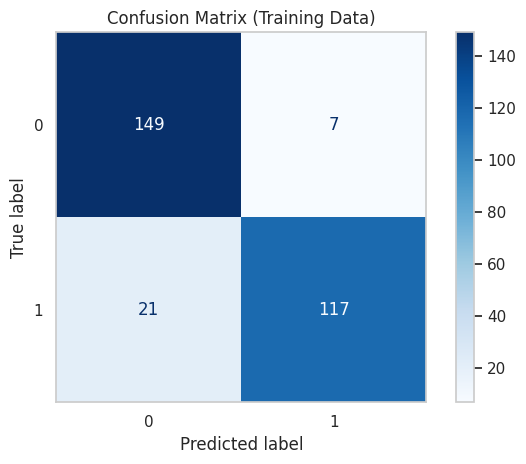

<Figure size 600x500 with 0 Axes>

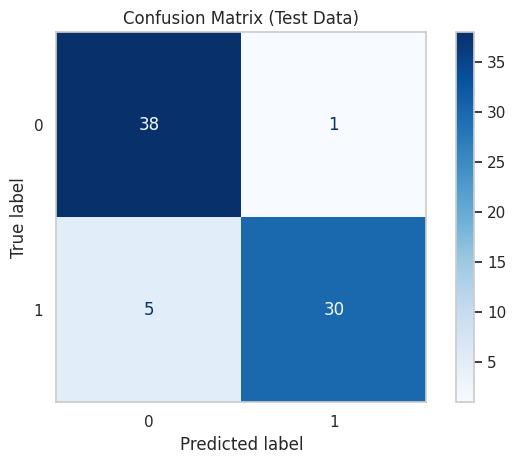

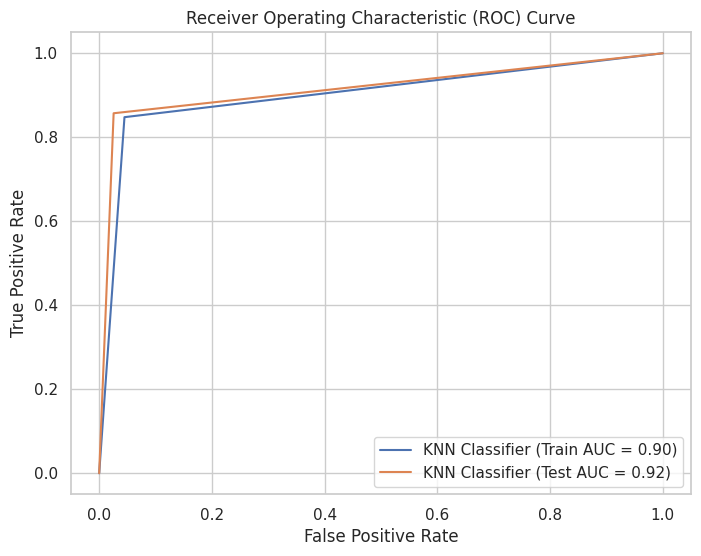

In [142]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Instantiate the KNN classifier
knn = KNeighborsClassifier(n_neighbors=9)  # Adjust n_neighbors as needed

# Train the classifier
knn.fit(v_train, y_train)

# Make predictions on the training data
y_train_pred = knn.predict(v_train)

# Make predictions on the test data
y_test_pred = knn.predict(v_test)

# Evaluate the performance on training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
auc_roc_train = roc_auc_score(y_train, y_train_pred)

# Print training performance metrics
print("Training Accuracy:", accuracy_train)
print("Training Precision:", precision_train)
print("Training AUC-ROC:", auc_roc_train)

# Evaluate the performance on test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
auc_roc_test = roc_auc_score(y_test, y_test_pred)

# Print test performance metrics
print("Test Accuracy:", accuracy_test)
print("Test Precision:", precision_test)
print("Test AUC-ROC:", auc_roc_test)

# Confusion Matrix for Training Data
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Displaying the Confusion Matrix for Training Data
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=knn.classes_)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=knn.classes_)

# Plot Training Confusion Matrix
plt.figure(figsize=(6, 5))
disp_train.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Training Data)")
plt.grid(False)
plt.tight_layout()
plt.show()

# Plot Test Confusion Matrix
plt.figure(figsize=(6, 5))
disp_test.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Test Data)")
plt.grid(False)
plt.tight_layout()
plt.show()

# ROC Curve (from hard predictions — less ideal, but consistent)
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='KNN Classifier (Train AUC = %0.2f)' % auc_roc_train)
plt.plot(fpr_test, tpr_test, label='KNN Classifier (Test AUC = %0.2f)' % auc_roc_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Training Accuracy: 0.9965986394557823
Training Precision: 1.0
Training AUC-ROC: 0.9963768115942029
Test Accuracy: 0.9594594594594594
Test Precision: 0.9444444444444444
Test AUC-ROC: 0.9600732600732601


<Figure size 600x500 with 0 Axes>

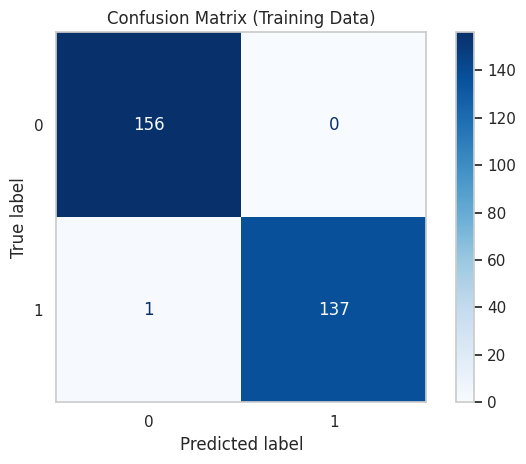

<Figure size 600x500 with 0 Axes>

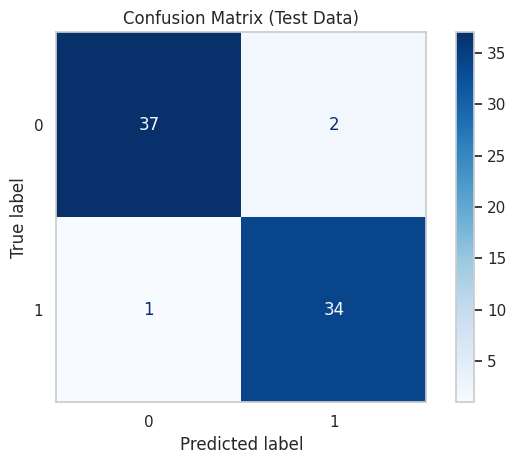

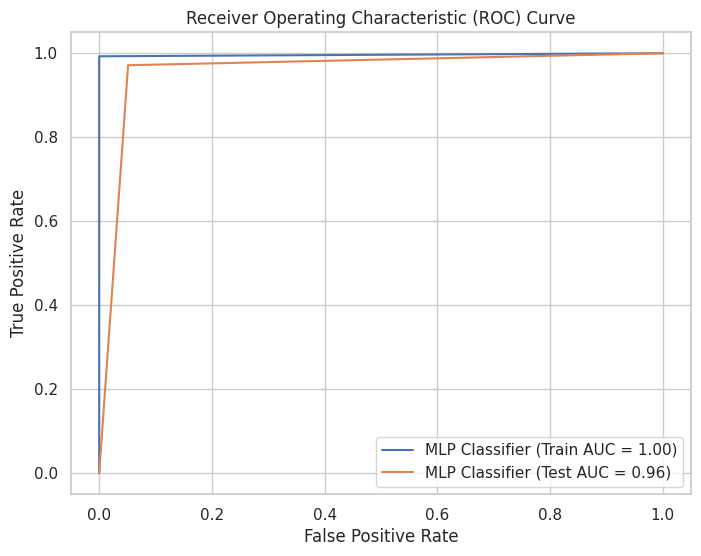

In [141]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Instantiate the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(220, 30), max_iter=100, random_state=42)

# Train the classifier
mlp.fit(v_train, y_train)

# Make predictions on the training data
y_train_pred = mlp.predict(v_train)

# Make predictions on the test data
y_test_pred = mlp.predict(v_test)

# Evaluate the performance on training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
auc_roc_train = roc_auc_score(y_train, y_train_pred)

# Print training performance metrics
print("Training Accuracy:", accuracy_train)
print("Training Precision:", precision_train)
print("Training AUC-ROC:", auc_roc_train)

# Evaluate the performance on test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
auc_roc_test = roc_auc_score(y_test, y_test_pred)

# Print test performance metrics
print("Test Accuracy:", accuracy_test)
print("Test Precision:", precision_test)
print("Test AUC-ROC:", auc_roc_test)

# Confusion Matrix for Training Data
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Displaying the Confusion Matrix for Training Data
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=mlp.classes_)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=mlp.classes_)

# Plot Training Confusion Matrix
plt.figure(figsize=(6, 5))
disp_train.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Training Data)")
plt.grid(False)
plt.tight_layout()
plt.show()

# Plot Test Confusion Matrix
plt.figure(figsize=(6, 5))
disp_test.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Test Data)")
plt.grid(False)
plt.tight_layout()
plt.show()

# ROC Curve (from hard predictions — less ideal, but consistent)
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='MLP Classifier (Train AUC = %0.2f)' % auc_roc_train)
plt.plot(fpr_test, tpr_test, label='MLP Classifier (Test AUC = %0.2f)' % auc_roc_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Best C: 1
Best gamma: 1
Training Accuracy: 1.0
Training Precision: 1.0
Training AUC-ROC: 1.0
Test Accuracy: 0.9523809523809523
Test Precision: 0.9795918367346939
Test AUC-ROC: 0.9521044992743106


<Figure size 600x500 with 0 Axes>

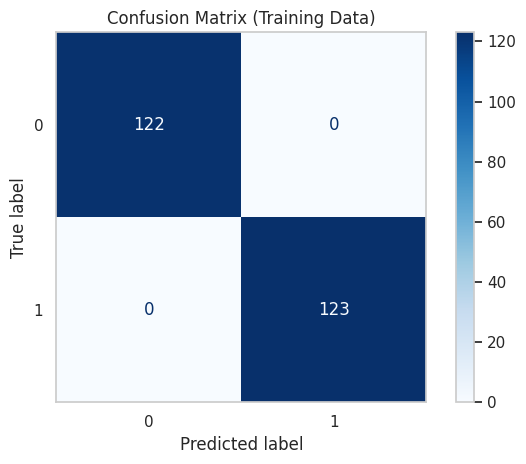

<Figure size 600x500 with 0 Axes>

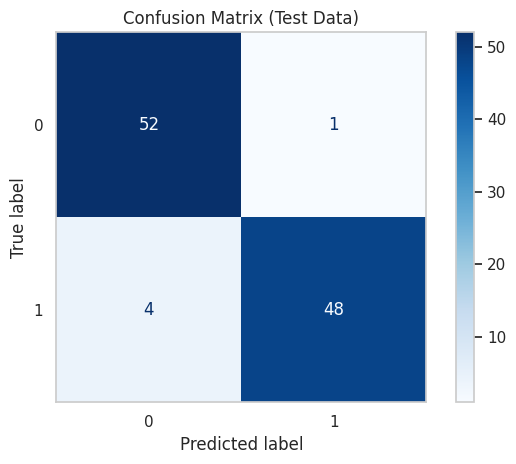

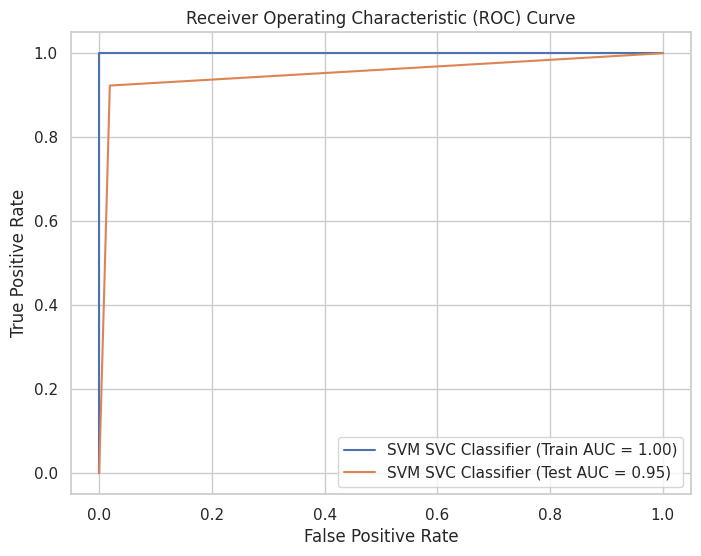

In [124]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],  # Adjust C values as needed
    'gamma': [0.1, 1, 10]  # Adjust gamma values as needed
}

# Instantiate the SVM classifier
svm = SVC(probability=True)  # SVC with probability=True to get probabilities for ROC curve

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(svm, param_grid, cv=5)  # Adjust cv (number of cross-validation folds)
grid_search.fit(v_train_tfidf, y_train)

# Get the best hyperparameters
best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']

print("Best C:", best_C)
print("Best gamma:", best_gamma)

# Instantiate the SVC classifier with the best hyperparameters
svm_best = SVC(C=best_C, gamma=best_gamma, probability=True)

# Train the classifier
svm_best.fit(v_train_tfidf, y_train)

# Make predictions on the training data
y_train_pred = svm_best.predict(v_train_tfidf)
y_test_pred = svm_best.predict(v_test_tfidf)

# Evaluate the performance on training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
auc_roc_train = roc_auc_score(y_train, y_train_pred)

# Print training performance metrics
print("Training Accuracy:", accuracy_train)
print("Training Precision:", precision_train)
print("Training AUC-ROC:", auc_roc_train)

# Evaluate the performance on test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
auc_roc_test = roc_auc_score(y_test, y_test_pred)

# Print test performance metrics
print("Test Accuracy:", accuracy_test)
print("Test Precision:", precision_test)
print("Test AUC-ROC:", auc_roc_test)

# Confusion Matrix for Training Data
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Displaying the Confusion Matrix for Training Data
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=svm_best.classes_)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=svm_best.classes_)

# Plot Training Confusion Matrix
plt.figure(figsize=(6, 5))
disp_train.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Training Data)")
plt.grid(False)
plt.tight_layout()
plt.show()

# Plot Test Confusion Matrix
plt.figure(figsize=(6, 5))
disp_test.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Test Data)")
plt.grid(False)
plt.tight_layout()
plt.show()

# ROC Curve (from hard predictions — less ideal, but consistent)
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='SVM SVC Classifier (Train AUC = %0.2f)' % auc_roc_train)
plt.plot(fpr_test, tpr_test, label='SVM SVC Classifier (Test AUC = %0.2f)' % auc_roc_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
#data = pd.read_csv('Youtube02-KatyPerry.csv')
#data = pd.read_csv('Youtube03-LMFAO.csv')
#data = pd.read_csv('Youtube04-Eminem.csv')
# data = pd.read_csv('/content/drive/My Drive/Datasets/Youtube05-Shakira.csv')


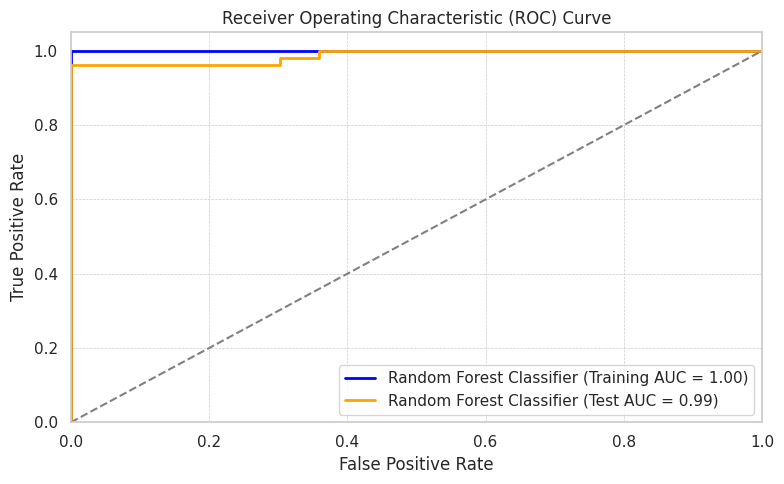

<Figure size 600x500 with 0 Axes>

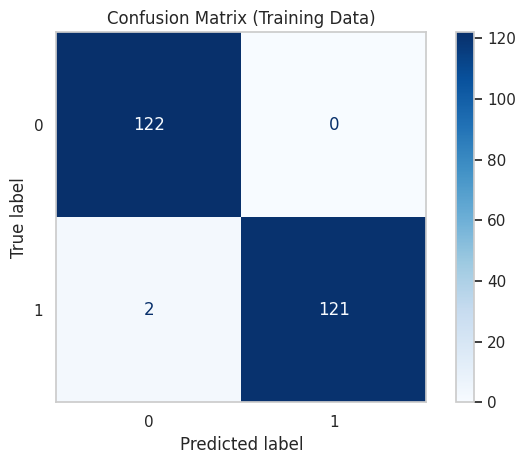

<Figure size 600x500 with 0 Axes>

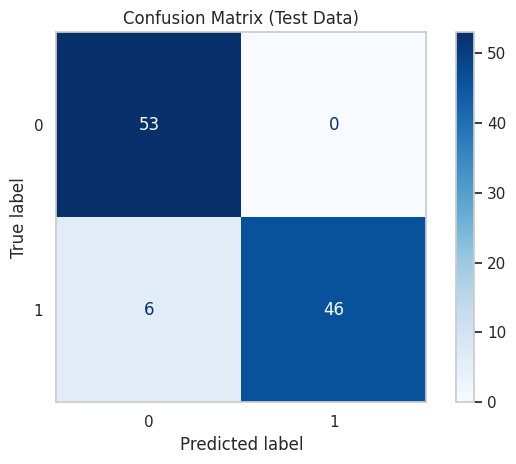

Training Accuracy: 0.99
Test Accuracy: 0.94
Training Precision: 1.00
Test Precision: 1.00
Training Recall: 0.98
Test Recall: 0.88
Training F1 Score: 0.99
Test F1 Score: 0.94


In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
)

# Load dataset
data = pd.read_csv("/content/drive/My Drive/Datasets/Youtube01-Psy.csv")
# data = pd.read_csv("/content/drive/My Drive/Datasets/Youtube02-KatyPerry.csv")
# data = pd.read_csv('/content/drive/My Drive/Datasets/Youtube03-LMFAO.csv')
# data = pd.read_csv('/content/drive/My Drive/Datasets/Youtube04-Eminem.csv')
# data = pd.read_csv('/content/drive/My Drive/Datasets/Youtube05-Shakira.csv')
X = data.iloc[:, 3].values  # COMMENT TEXT
y = data.iloc[:, 4].values  # CLASS

# Split (Stratify to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Random Forest Grid Search
param_grid = {'n_estimators': [100], 'max_depth': [10, 20]}
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc'
)
grid_search.fit(X_train_tfidf, y_train)

# Best Model
model = grid_search.best_estimator_
model.fit(X_train_tfidf, y_train)

# Probabilities for ROC (smoothed)
y_train_proba = model.predict_proba(X_train_tfidf)[:, 1]
y_test_proba = model.predict_proba(X_test_tfidf)[:, 1]

# ROC Curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
auc_train = roc_auc_score(y_train, y_train_proba)
auc_test = roc_auc_score(y_test, y_test_proba)

# Plot ROC Curve
plt.figure(figsize=(8, 5))
plt.plot(fpr_train, tpr_train, color='blue', linewidth=2,
         label=f"Random Forest Classifier (Training AUC = {auc_train:.2f})")
plt.plot(fpr_test, tpr_test, color='orange', linewidth=2,
         label=f"Random Forest Classifier (Test AUC = {auc_test:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.tight_layout()
plt.show()

# Predictions
y_train_pred = model.predict(X_train_tfidf)
y_test_pred = model.predict(X_test_tfidf)

# Confusion Matrix for Training Data
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Displaying the Confusion Matrix for Training and Test Data
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=model.classes_)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=model.classes_)

# Plot Training Confusion Matrix
plt.figure(figsize=(6, 5))
disp_train.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Training Data)")
plt.grid(False)
plt.tight_layout()
plt.show()

# Plot Test Confusion Matrix
plt.figure(figsize=(6, 5))
disp_test.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Test Data)")
plt.grid(False)
plt.tight_layout()
plt.show()

# Print Metrics for Additional Evaluation
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.2f}")
print(f"Training Precision: {precision_score(y_train, y_train_pred):.2f}")
print(f"Test Precision: {precision_score(y_test, y_test_pred):.2f}")
print(f"Training Recall: {recall_score(y_train, y_train_pred):.2f}")
print(f"Test Recall: {recall_score(y_test, y_test_pred):.2f}")
print(f"Training F1 Score: {f1_score(y_train, y_train_pred):.2f}")
print(f"Test F1 Score: {f1_score(y_test, y_test_pred):.2f}")


In [115]:
len(y_train)

245

Training feature shape (v_train): (245,)
Training label shape (y_train): (245,)
Test feature shape (v_test): (105,)
Test label shape (y_test): (105,)
Transformed training feature shape (v_train_tfidf): (245, 981)
Transformed test feature shape (v_test_tfidf): (105, 981)
Training Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC-ROC: 1.0

Test Metrics:
Accuracy: 0.9809523809523809
Precision: 1.0
Recall: 0.9615384615384616
F1 Score: 0.9803921568627451
AUC-ROC: 0.9807692307692308


<Figure size 600x500 with 0 Axes>

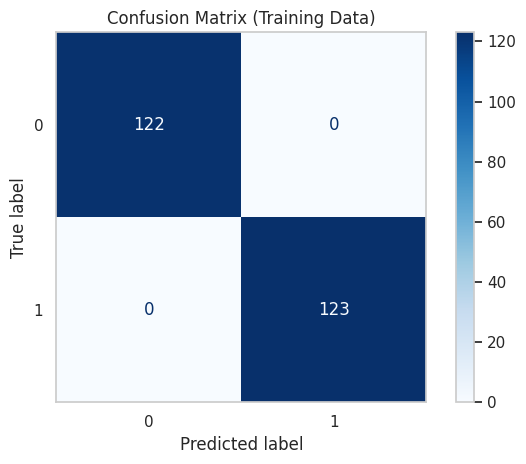

<Figure size 600x500 with 0 Axes>

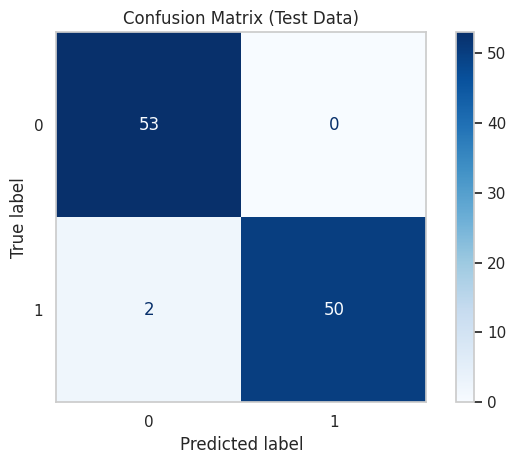

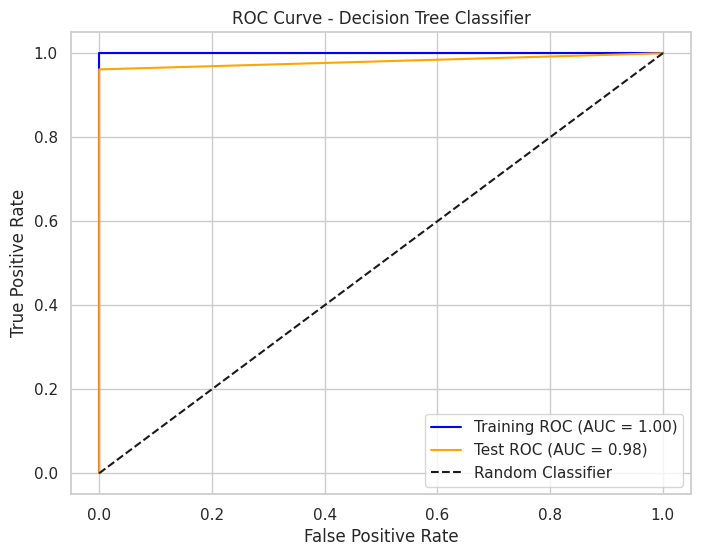

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay)
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset (adjust the file path as necessary)
data = pd.read_csv("/content/drive/My Drive/Datasets/Youtube01-Psy.csv")
# data = pd.read_csv("/content/drive/My Drive/Datasets/Youtube02-KatyPerry.csv")
# data = pd.read_csv('/content/drive/My Drive/Datasets/Youtube03-LMFAO.csv')
# data = pd.read_csv('/content/drive/My Drive/Datasets/Youtube04-Eminem.csv')
# data = pd.read_csv('/content/drive/My Drive/Datasets/Youtube05-Shakira.csv')

# Features and labels
X = data.iloc[:, 3].values  # COMMENT TEXT
y = data.iloc[:, 4].values  # CLASS

# Split data (stratified to preserve class balance)
v_train, v_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Verify the shapes of the train and test splits
print(f"Training feature shape (v_train): {v_train.shape}")
print(f"Training label shape (y_train): {y_train.shape}")
print(f"Test feature shape (v_test): {v_test.shape}")
print(f"Test label shape (y_test): {y_test.shape}")

# TF-IDF Vectorization (transforming text data into numerical format)
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
v_train_tfidf = vectorizer.fit_transform(v_train)
v_test_tfidf = vectorizer.transform(v_test)

# Verify the shapes of the transformed features
print(f"Transformed training feature shape (v_train_tfidf): {v_train_tfidf.shape}")
print(f"Transformed test feature shape (v_test_tfidf): {v_test_tfidf.shape}")

# Instantiate and train the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(v_train_tfidf, y_train)

# Predictions (class) and Probabilities (for ROC)
y_train_pred = decision_tree.predict(v_train_tfidf)
y_test_pred = decision_tree.predict(v_test_tfidf)
y_train_prob = decision_tree.predict_proba(v_train_tfidf)[:, 1]
y_test_prob = decision_tree.predict_proba(v_test_tfidf)[:, 1]

# --- Training Metrics ---
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
auc_roc_train = roc_auc_score(y_train, y_train_prob)

print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print("AUC-ROC:", auc_roc_train)

# --- Test Metrics ---
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
auc_roc_test = roc_auc_score(y_test, y_test_prob)

print("\nTest Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("AUC-ROC:", auc_roc_test)

# --- Confusion Matrix for Training Data ---
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Displaying the Confusion Matrix for Training Data
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=decision_tree.classes_)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=decision_tree.classes_)

# Plot Training Confusion Matrix
plt.figure(figsize=(6, 5))
disp_train.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Training Data)")
plt.grid(False)
plt.tight_layout()
plt.show()

# Plot Test Confusion Matrix
plt.figure(figsize=(6, 5))
disp_test.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Test Data)")
plt.grid(False)
plt.tight_layout()
plt.show()

# --- ROC Curves ---
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Training ROC (AUC = %0.2f)' % auc_roc_train, color='blue')
plt.plot(fpr_test, tpr_test, label='Test ROC (AUC = %0.2f)' % auc_roc_test, color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Train Accuracy: 1.0
Train Precision: 1.0
Train Recall: 1.0
Train F1 Score: 1.0
Train AUC-ROC: 1.0
Test Accuracy: 0.9523809523809523
Test Precision: 0.9795918367346939
Test Recall: 0.9230769230769231
Test F1 Score: 0.9504950495049505
Test AUC-ROC: 0.9521044992743106


<Figure size 600x500 with 0 Axes>

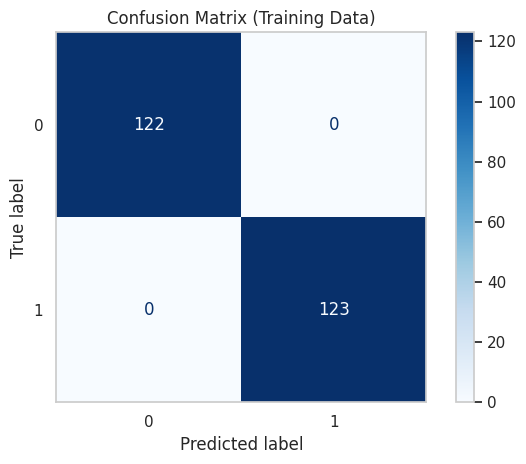

<Figure size 600x500 with 0 Axes>

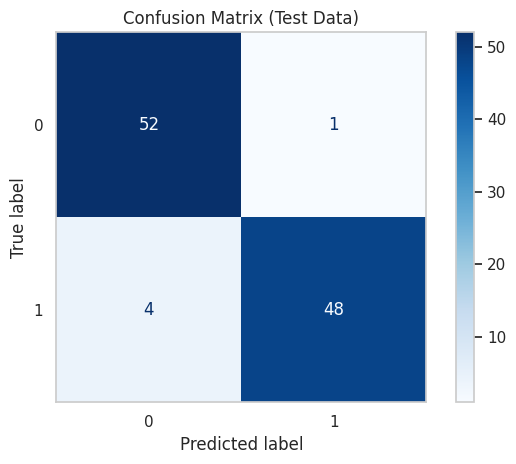

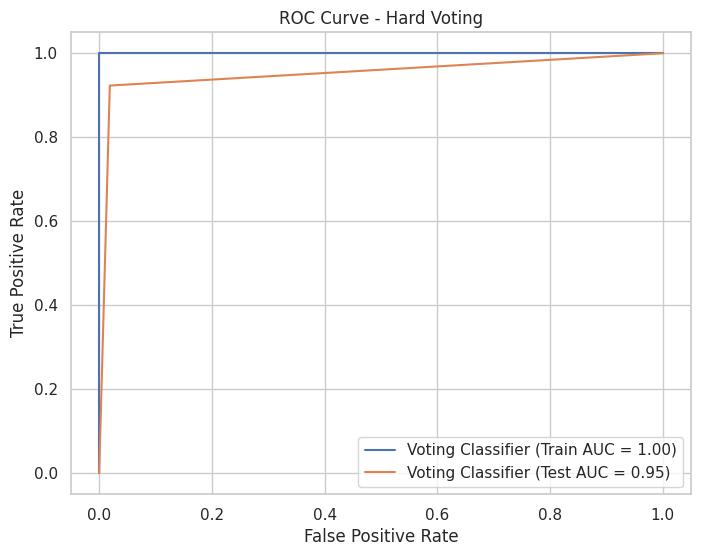

In [123]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Define individual classifiers
knn_classifier = KNeighborsClassifier()
mlp_classifier = MLPClassifier(max_iter=1000, random_state=0)
svc_classifier = SVC(probability=True)  # still needed if you ever use 'soft' later
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

# Create a Voting Classifier (hard voting)
voting_classifier = VotingClassifier(
    estimators=[
        ('knn', knn_classifier),
        ('mlp', mlp_classifier),
        ('svc', svc_classifier),
        ('decision_tree', decision_tree),
        ('random_forest', random_forest)
    ],
    voting='hard'
)

# Train the classifier
voting_classifier.fit(v_train_tfidf, y_train)

# Predict on train and test
y_train_pred = voting_classifier.predict(v_train_tfidf)
y_test_pred = voting_classifier.predict(v_test_tfidf)

# Training metrics
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
auc_roc_train = roc_auc_score(y_train, y_train_pred)

# Testing metrics
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
auc_roc_test = roc_auc_score(y_test, y_test_pred)

# Print all metrics
print("Train Accuracy:", accuracy_train)
print("Train Precision:", precision_train)
print("Train Recall:", recall_train)
print("Train F1 Score:", f1_train)
print("Train AUC-ROC:", auc_roc_train)

print("Test Accuracy:", accuracy_test)
print("Test Precision:", precision_test)
print("Test Recall:", recall_test)
print("Test F1 Score:", f1_test)
print("Test AUC-ROC:", auc_roc_test)

# Confusion Matrix for Training Data
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Displaying the Confusion Matrix for Training Data
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=voting_classifier.classes_)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=voting_classifier.classes_)

# Plot Training Confusion Matrix
plt.figure(figsize=(6, 5))
disp_train.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Training Data)")
plt.grid(False)
plt.tight_layout()
plt.show()

# Plot Test Confusion Matrix
plt.figure(figsize=(6, 5))
disp_test.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Test Data)")
plt.grid(False)
plt.tight_layout()
plt.show()

# ROC Curve (from hard predictions — less ideal, but consistent)
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Voting Classifier (Train AUC = %0.2f)' % auc_roc_train)
plt.plot(fpr_test, tpr_test, label='Voting Classifier (Test AUC = %0.2f)' % auc_roc_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Hard Voting')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
